## Time Series forcasting ( Bitcoin predict)

### Imports

In [1]:
#At first, we import python libraries that we need
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

### Get Data

In [2]:
df = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates=["Date"],
                 index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
df.__len__()

2787

In [5]:
bitcoin_prices= pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})

bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


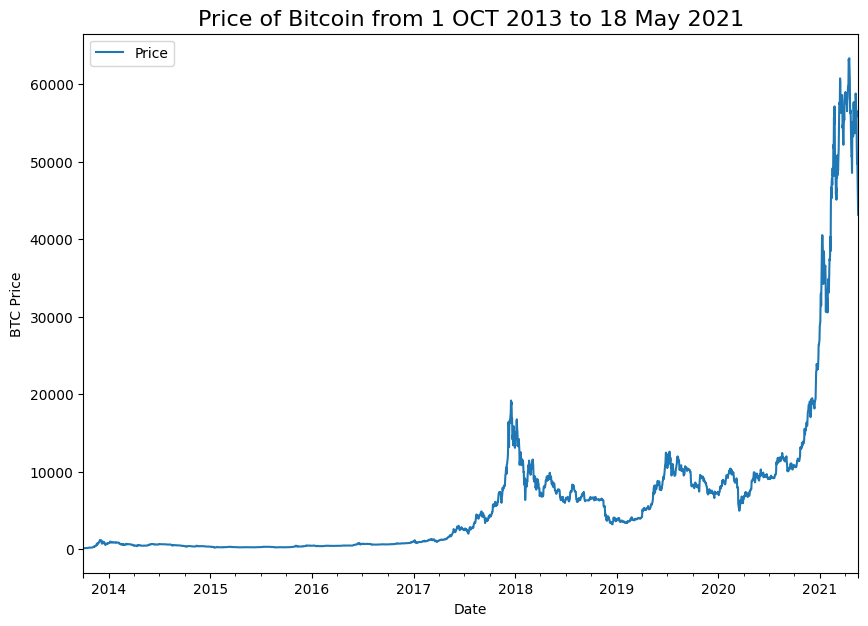

In [6]:
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 OCT 2013 to 18 May 2021",fontsize=16)
plt.legend()

### Split training and testing sets ( Wrong way )

In [7]:
# Get bitcoin data array
timesteps = bitcoin_prices.index.to_numpy()
prices= bitcoin_prices["Price"].to_numpy()

timesteps[:10],prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(timesteps,
                                                   prices,
                                                   test_size=0.2,
                                                   random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2229,), (558,), (2229,), (558,))

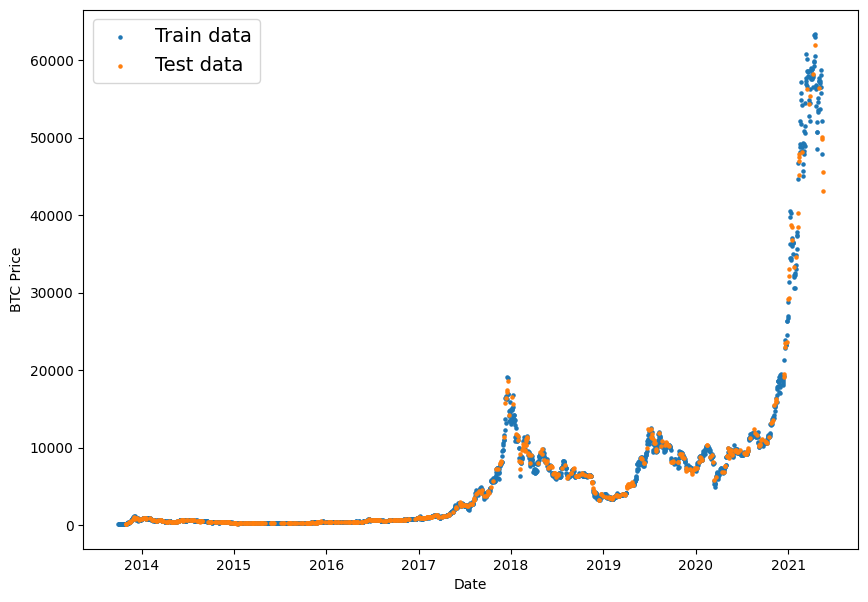

In [9]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

### Split training and testing sets ( Right way )

In [10]:
split_size=int(0.8 * len(prices))

X_train,y_train=timesteps[:split_size],prices[:split_size]

X_test,y_test= timesteps[split_size:],prices[split_size:]

len(X_train),len(X_test),len(y_train),len(y_test)

(2229, 558, 2229, 558)

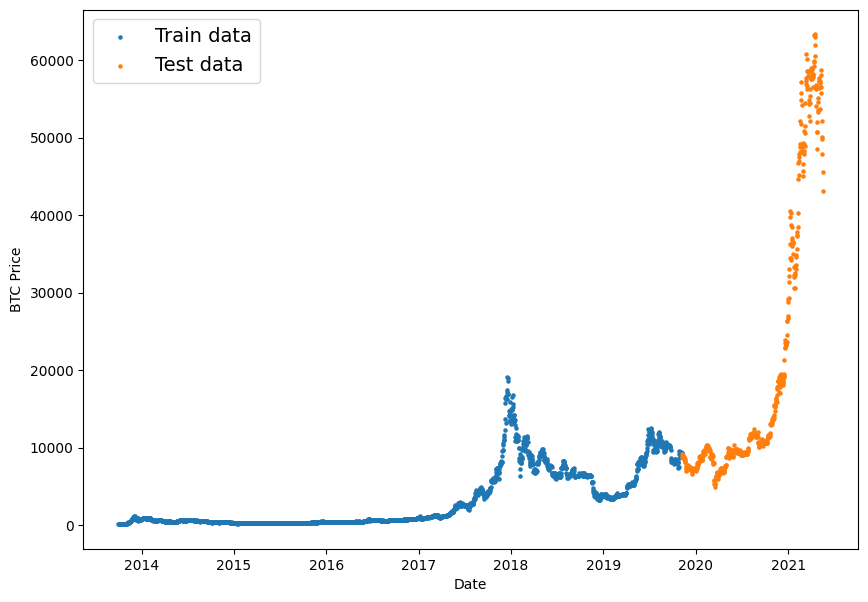

In [11]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

### Create Plottting function

In [12]:
def plot_time_series(timesteps,values,format=".",start=0,end=None,label=None):
    plt.plot(timesteps[start:end],values[start:end],format,label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

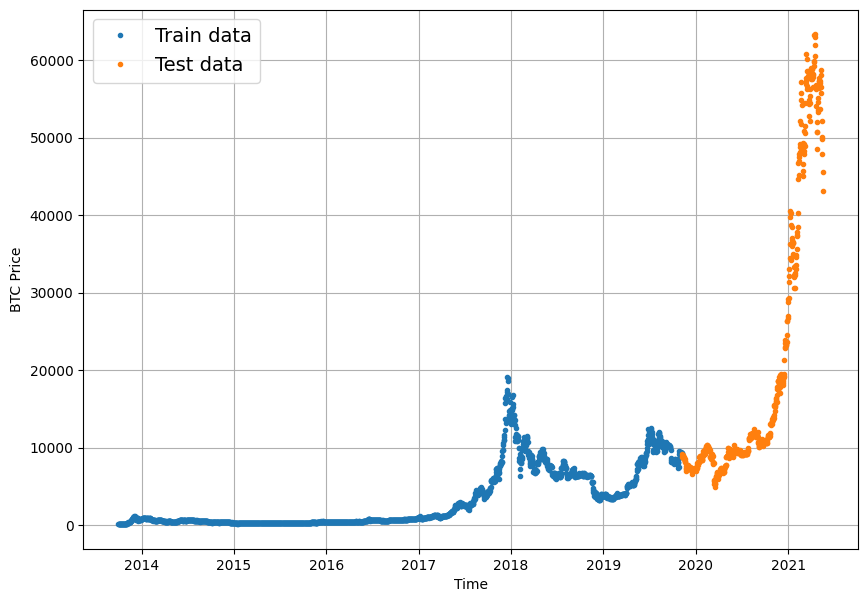

In [13]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label="Train data")
plot_time_series(timesteps=X_test,values=y_test,label="Test data")

## Model 0 : Naive Forecasting 

In [14]:
naive_forecast=y_test[:-1]

naive_forecast[:10],naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

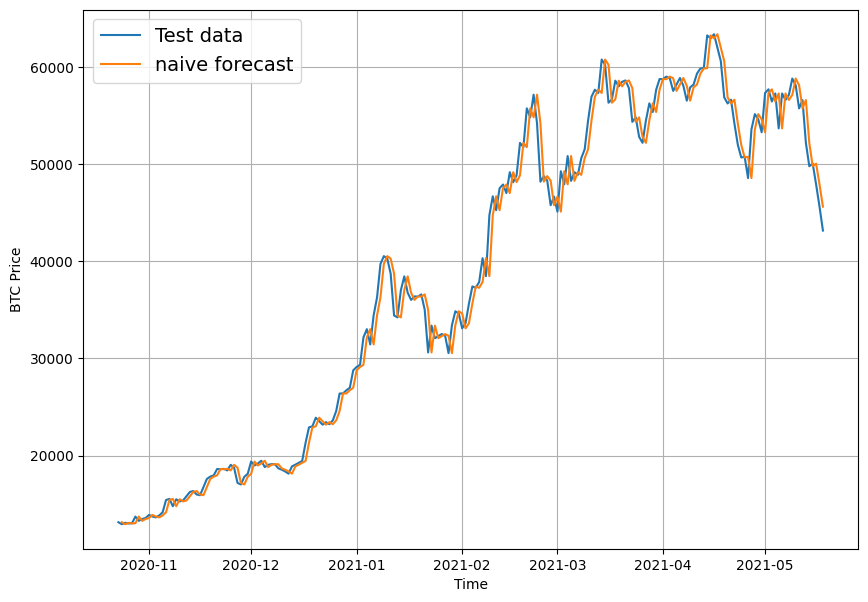

In [15]:
plt.figure(figsize=(10,7))
# plot_time_series(timesteps=X_train,values=y_train,label="Train data")
plot_time_series(timesteps=X_test,values=y_test,start=350,format="-",label="Test data")
plot_time_series(timesteps=X_test[1:],values=naive_forecast,start=350,format="-",label="naive forecast")

In [16]:
import tensorflow as tf

In [17]:
# MASE implementation
def mean_absolute_scaled_error(y_true,y_pred):
    mae=tf.reduce_mean(tf.abs(y_true-y_pred))
    
    # Find MAE of naive forecast (no seasonality)
    mae_naive_no_season= tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
    
    return mae/mae_naive_no_season

In [18]:
mean_absolute_scaled_error(y_true=y_test[1:],y_pred=naive_forecast)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9995699939182624>

In [19]:
# Create function to take model preds and truth values 

def evaluate_preds(y_true,y_pred):
    # Make sure float32 dtype 
    y_true= tf.cast(y_true,dtype=tf.float32)
    y_pred=tf.cast(y_pred,dtype=tf.float32)
    
    # Calculate various evaluation metrics 
    mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
    rmse= tf.sqrt(mse)
    mape=tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
    mase = mean_absolute_scaled_error(y_true,y_pred)
    
    # Avvount for different sized metrics 
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)
    
    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse":rmse.numpy(),
            "mape": mape.numpy(),
            "mase": mase.numpy(),
            }

In [20]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Format Data Part 2: Windowing dataset

why windowing ? 

Windowing time series dataset turns the data to a supervised learning problem

In [21]:
print(f"We want to use:{prices[:7]} to predict this: {prices[7]}")

We want to use:[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] to predict this: 123.033


In [22]:
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use past week of data to predict

In [23]:
# function to label windowed data 
def get_labelled_window(x, horizon=HORIZON):
    return x[:,:-horizon],x[:,-horizon:]

In [24]:
test_window,test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1,axis=0))

print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


### Preprocessing data to windows formatted 

In [25]:
# Create function to view Numpy arrays as windows

def make_windows(x,window_size=WINDOW_SIZE, horizon=HORIZON):
    # 1. turns 1D to 2D array of sequential labelled windows of window_size
    window_step=np.expand_dims(np.arange(window_size+horizon),axis=0)
    
    # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
    window_indexes= window_step +np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T # create 2D array of windows of size window_size
    
    print(f"Window indexes:\n {window_indexes,window_indexes.shape}")
    
    # 3. Index on the target array (a time series) with 2D arra of multiple window steps
    windowed_array = x[window_indexes]
    # print(windowed_array)
    
    # 4. Get labelled windows
    windows,labels = get_labelled_window(windowed_array,horizon=horizon)
    
    return windows,labels

In [26]:
full_windows,full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)

len(full_windows),len(full_labels)

Window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2780, 2780)

In [27]:
# view the first 3 windows/labels
for i in range(3):
    print(f"Window: {full_windows[i]} -> Label {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label [125.96116]


In [28]:
# view the last 3 windows/labels
for i in range(3):
    print(f"Window: {full_windows[i-3]} -> Label {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label [43144.47129086]


### HOWEVER 💡
 there is a already built in tensorflow function for preprocessing timeseries forecasting data: 
 - tf.keras.preprocessing.timeseries_dataset_from_array()

## Turning windows into training and test sets

In [29]:
# Make the train/test splits
def make_train_test_splits(windows, labels,test_split=0.2):
    
    splits_size=int(len(windows)*(1-test_split)) # this will deafult to 80% train / 20% test
    
    train_windows=windows[:split_size]
    train_labels=labels[:split_size]
    test_windows=windows[split_size:]
    test_labels=labels[split_size:]
    
    return train_windows, test_windows, train_labels , test_labels

In [30]:
# Create train and test windows 
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 551, 2229, 551)

In [31]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

## Make a modelling checkpoint 

Because our model's performance will fluctuate from experiment


In [32]:
import os
 # Create a function to implement a ModelCheckpoint callback with a specific filename
 
def create_model_checkpoint(model_name,save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
    verbose=0,
    save_best_only=True)

#### Model 1: Dense model (window = 7, horizon = 1)

In [33]:
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON,activation="linear")# linear activation is = No activation
    
],name="model_1_dense")

# 2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

# 3. Fit the model

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 3s 50ms/step - loss: 770.8699 - mae: 770.8699 - mse: 2322506.0000 - val_loss: 2211.9968 - val_mae: 2211.9968 - val_mse: 12191257.0000
Epoch 2/100
18/18 [==============================] - 1s 34ms/step - loss: 231.9996 - mae: 231.9996 - mse: 235887.3438 - val_loss: 1010.5923 - val_mae: 1010.5923 - val_mse: 3439082.0000
Epoch 3/100
18/18 [==============================] - 1s 33ms/step - loss: 176.6514 - mae: 176.6514 - mse: 158764.5000 - val_loss: 936.3781 - val_mae: 936.3781 - val_mse: 2858712.0000
Epoch 4/100
18/18 [==============================] - 1s 31ms/step - loss: 163.9299 - mae: 163.9299 - mse: 144408.6562 - val_loss: 914.9297 - val_mae: 914.9297 - val_mse: 2706202.0000
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 158.4962 - mae: 158.4962 - mse: 135340.5000 - val_loss: 916.9713 - val_mae: 916.9713 - val_mse: 2605687.7500
Epoch 6/100
18/18 [==============================] - 1s 34ms/step - loss: 152.12

In [34]:
# # Evaluate model on test data 
# model_1.evaluate(test_windows,test_labels)

In [35]:
# Load in saved best performing model_1 and evalutate it on test data
model_1= tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.3397 - mae: 570.3397 - mse: 1180294.8750


[570.3397216796875, 570.3397216796875, 1180294.875]

### Making forecast with a model (on the test dataset)


In [36]:
def make_preds(model,input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast)

In [37]:
# Mkae predictions 

model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(551,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8753.916 , 8694.882 , 8529.392 , 8478.009 , 8532.248 , 8275.483 ,
        8132.823 , 8078.0557, 7702.9907, 7311.7354], dtype=float32)>)

In [38]:
model_1_results= evaluate_preds(y_true=tf.squeeze(test_labels),y_pred=model_1_preds)
model_1_results

{'mae': 570.3397,
 'mse': 1180294.9,
 'rmse': 1086.4137,
 'mape': 2.5392227,
 'mase': 0.99544233}

In [39]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [40]:
test_labels.shape

(551, 1)

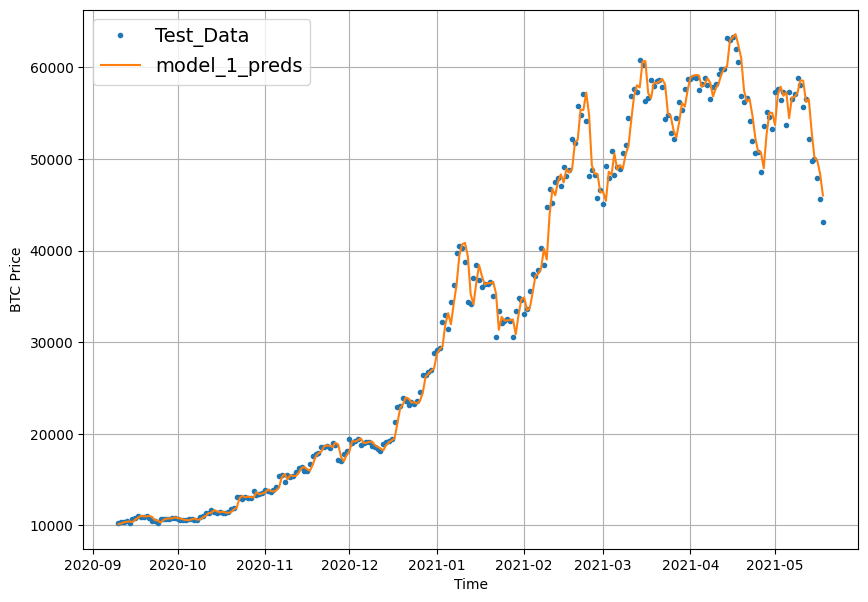

In [41]:
# Plot model 1 preds
offset= 300
plt.figure(figsize=(10,7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="Test_Data")


plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="model_1_preds")

### Model 2: Dense (window = 30, horizon = 1)

In [42]:
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 30 # use past week of data to predict

In [43]:
full_windows,full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)

len(full_windows),len(full_labels)

Window indexes:
 (array([[   0,    1,    2, ...,   28,   29,   30],
       [   1,    2,    3, ...,   29,   30,   31],
       [   2,    3,    4, ...,   30,   31,   32],
       ...,
       [2754, 2755, 2756, ..., 2782, 2783, 2784],
       [2755, 2756, 2757, ..., 2783, 2784, 2785],
       [2756, 2757, 2758, ..., 2784, 2785, 2786]]), (2757, 31))


(2757, 2757)

In [44]:
# Create train and test windows 
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,
                                    full_labels,
                                    test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 528, 2229, 528)

In [45]:
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_2 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON,activation="linear")# linear activation is = No activation
    
],name="model_2_dense")

# 2. Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

# 3. Fit the model

model_2.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
18/18 [==============================] - 1s 41ms/step - loss: 1064.9371 - mae: 1064.9371 - mse: 4542821.5000 - val_loss: 2895.4021 - val_mae: 2895.4021 - val_mse: 19567448.0000
Epoch 2/100
18/18 [==============================] - 1s 36ms/step - loss: 420.6906 - mae: 420.6906 - mse: 778456.2500 - val_loss: 1432.5330 - val_mae: 1432.5330 - val_mse: 6157843.5000
Epoch 3/100
18/18 [==============================] - 1s 50ms/step - loss: 273.6108 - mae: 273.6108 - mse: 341361.1250 - val_loss: 1184.9758 - val_mae: 1184.9758 - val_mse: 4246033.5000
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 229.8811 - mae: 229.8811 - mse: 233569.3281 - val_loss: 1460.8365 - val_mae: 1460.8365 - val_mse: 5247291.5000
Epoch 5/100
18/18 [==============================] - 1s 48ms/step - loss: 187.4495 - mae: 187.4495 - mse: 170886.5312 - val_loss: 1086.8778 - val_mae: 1086.8778 - val_mse: 3473265.7500
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss:

In [46]:
model_2.evaluate(test_windows,test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 632.3493 - mae: 632.3493 - mse: 1350409.2500


[632.3493041992188, 632.3493041992188, 1350409.25]

In [47]:
# Load in saved best performing model_1 and evalutate it on test data
model_2= tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows,test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 630.8035 - mae: 630.8035 - mse: 1354822.0000


[630.803466796875, 630.803466796875, 1354822.0]

In [48]:
# Get forecast predictions 
model_2_preds =make_preds(model_2,
                          input_data=test_windows)

In [49]:
# Evaluate results for model 2 predictions 
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 630.8034,
 'mse': 1354821.9,
 'rmse': 1163.9681,
 'mape': 2.779669,
 'mase': 1.0676835}

In [50]:
model_1_results

{'mae': 570.3397,
 'mse': 1180294.9,
 'rmse': 1086.4137,
 'mape': 2.5392227,
 'mase': 0.99544233}

In [51]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

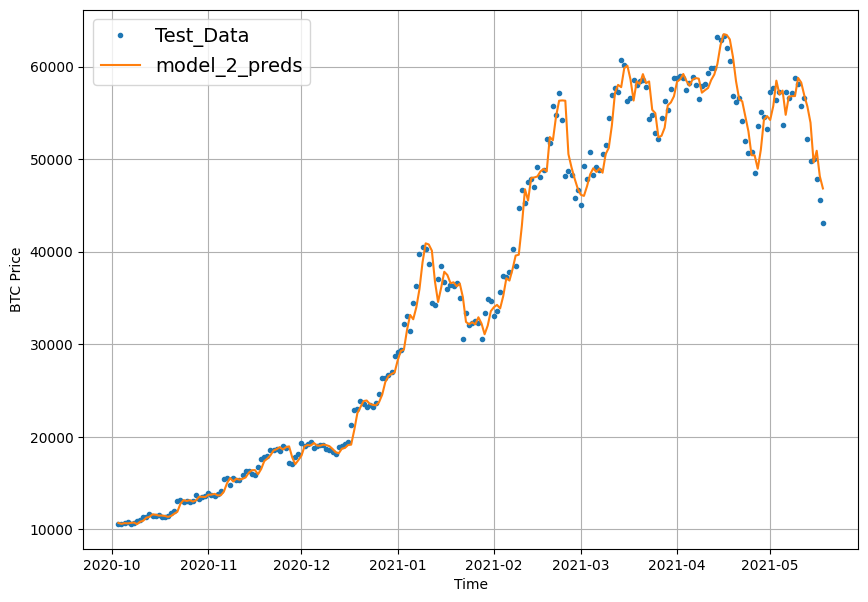

In [52]:
# Plot model 1 preds
offset= 300
plt.figure(figsize=(10,7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="Test_Data")


plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_2_preds,
                 start=offset,
                 format="-",
                 label="model_2_preds")

### Model 3: Dense (window = 30, horizon = 7)

In [53]:
HORIZON = 7 # predict next 1 day
WINDOW_SIZE = 30 # use past week of data to predict

In [54]:
full_windows,full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)

len(full_windows),len(full_labels)

Window indexes:
 (array([[   0,    1,    2, ...,   34,   35,   36],
       [   1,    2,    3, ...,   35,   36,   37],
       [   2,    3,    4, ...,   36,   37,   38],
       ...,
       [2748, 2749, 2750, ..., 2782, 2783, 2784],
       [2749, 2750, 2751, ..., 2783, 2784, 2785],
       [2750, 2751, 2752, ..., 2784, 2785, 2786]]), (2751, 37))


(2751, 2751)

In [55]:
# Create train and test windows 
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,
                                    full_labels,
                                    test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 522, 2229, 522)

In [56]:
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_3 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON,activation="linear")# linear activation is = No activation
    
],name="model_3_dense")

# 2. Compile
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

# 3. Fit the model

model_3.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
18/18 [==============================] - 1s 40ms/step - loss: 1438.0601 - mae: 1438.0601 - mse: 9678379.0000 - val_loss: 2992.5237 - val_mae: 2992.5237 - val_mse: 23649864.0000
Epoch 2/100
18/18 [==============================] - 1s 35ms/step - loss: 561.0258 - mae: 561.0258 - mse: 1391133.7500 - val_loss: 2527.2437 - val_mae: 2527.2437 - val_mse: 17928038.0000
Epoch 3/100
18/18 [==============================] - 1s 33ms/step - loss: 439.0709 - mae: 439.0709 - mse: 889382.1875 - val_loss: 2125.8506 - val_mae: 2125.8506 - val_mse: 13159097.0000
Epoch 4/100
18/18 [==============================] - 1s 31ms/step - loss: 390.0160 - mae: 390.0160 - mse: 711626.5000 - val_loss: 2003.1595 - val_mae: 2003.1595 - val_mse: 11794316.0000
Epoch 5/100
18/18 [==============================] - 1s 32ms/step - loss: 353.4758 - mae: 353.4758 - mse: 599935.2500 - val_loss: 1783.8618 - val_mae: 1783.8618 - val_mse: 9722763.0000
Epoch 6/100
18/18 [==============================] - 1s 41ms/step -

In [57]:
model_3.evaluate(test_windows,test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 1322.9520 - mae: 1322.9520 - mse: 5757059.0000


[1322.9520263671875, 1322.9520263671875, 5757059.0]

In [58]:
# Load in saved best performing model_1 and evalutate it on test data
model_3= tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows,test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 1297.3577 - mae: 1297.3577 - mse: 5756688.5000


[1297.357666015625, 1297.357666015625, 5756688.5]

In [59]:
# Get forecast predictions 
model_3_preds =make_preds(model_3,
                          input_data=test_windows)

In [60]:
# Evaluate results for model 3 predictions 
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1297.3578,
 'mse': 5756688.5,
 'rmse': 1484.7218,
 'mape': 5.6257334,
 'mase': 2.218213}

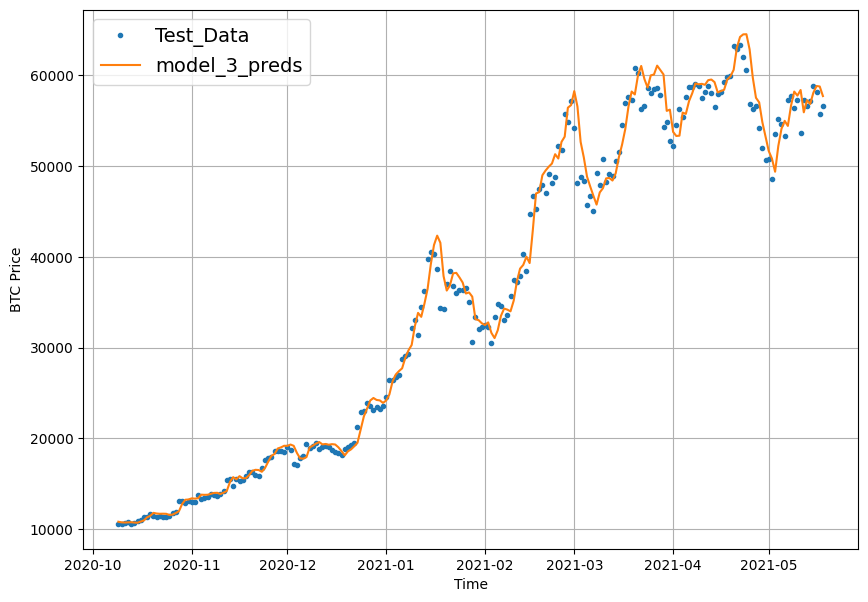

In [61]:
# Plot model 1 preds
offset= 300
plt.figure(figsize=(10,7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="Test_Data")


plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds,axis=1),
                 start=offset,
                 format="-",
                 label="model_3_preds")

### Comparing all models


<AxesSubplot: >

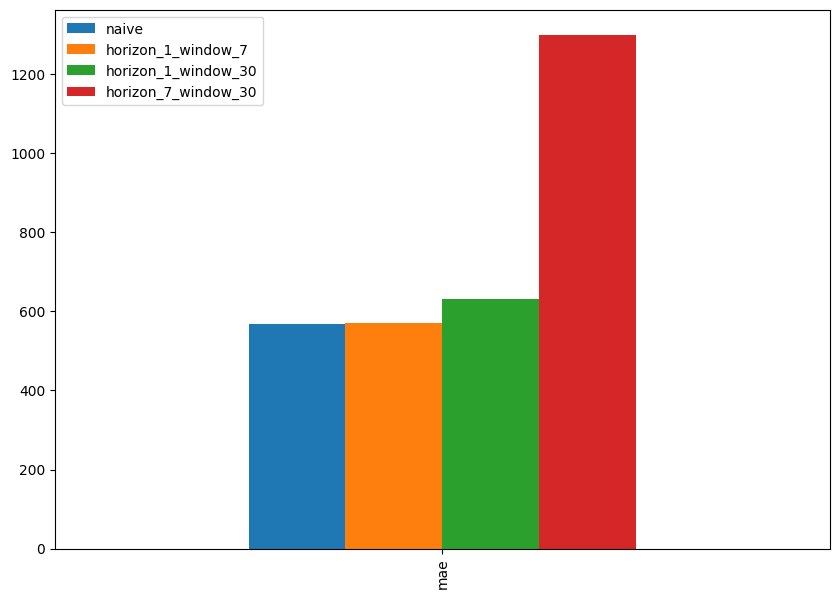

In [62]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7" : model_1_results["mae"],
              "horizon_1_window_30" : model_2_results["mae"],
              "horizon_7_window_30" : model_3_results["mae"]},index=["mae"]).plot(figsize=(10,7),kind="bar")

## Model 4 : Conv1D

In [63]:
HORIZON = 1
WINDOW_SIZE = 7 

In [64]:
# create windowed data 
full_windows , full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)

len(full_windows),len(full_labels),len(test_windows),len(test_labels)

Window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2780, 2780, 522, 522)

In [65]:
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,full_labels)

len(train_windows),len(train_labels),len(test_windows),len(test_labels)

(2229, 2229, 551, 551)

In [66]:
# check data input shape 
train_windows[0].shape

(7,)

In [67]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [68]:
expand_dims_layer= layers.Lambda(lambda x: tf.expand_dims(x,axis=1))

In [69]:
# test lambda layer 
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [70]:
model_4=tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x,axis=1)),
    layers.Conv1D(128, kernel_size=5,strides=1,padding="causal",activation="relu"),
    layers.Dense(HORIZON)   
],name="model_4_conv1D")


# Compile model 

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
18/18 [==============================] - 6s 52ms/step - loss: 2357.3088 - val_loss: 5599.9692
Epoch 2/100
18/18 [==============================] - 1s 42ms/step - loss: 435.0040 - val_loss: 1410.0981
Epoch 3/100
18/18 [==============================] - 1s 39ms/step - loss: 221.4294 - val_loss: 1066.2332
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 198.0986 - val_loss: 1096.9601
Epoch 5/100
18/18 [==============================] - 1s 38ms/step - loss: 185.1633 - val_loss: 1055.9840
Epoch 6/100
18/18 [==============================] - 1s 40ms/step - loss: 181.8858 - val_loss: 1030.4381
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 180.4877 - val_loss: 1035.0334
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 178.0079 - val_loss: 1040.5681
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 175.7238 - val_loss: 1042.5944
Epoch 10/100
18/18 [==============================] - 1s 4

In [71]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [72]:
# Evaluate model
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 8ms/step - loss: 832.9640


832.9639892578125

In [73]:
# Load in best performing Conv1D and revaluate
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 574.7781


574.778076171875

In [74]:
# Mkae predictions

model_4_preds = make_preds(model_4,test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8704.815 , 8669.115 , 8521.997 , 8436.322 , 8502.095 , 8255.512 ,
       8108.7847, 8042.412 , 7691.715 , 7315.2524], dtype=float32)>

In [75]:
# Evaluate preds 
model_4_results =evaluate_preds(tf.squeeze(test_labels),
                                model_4_preds)
model_4_results

{'mae': 574.778,
 'mse': 1190340.9,
 'rmse': 1091.0275,
 'mape': 2.5663424,
 'mase': 1.0031887}

## Model 5: RNN (LSTM)


In [76]:
tf.random.set_seed(42)

inputs=layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x,axis=1))(inputs)
# x = layers.LSTM(128,return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32,activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output ,name ="model_5_LSTM")


# Compile model 

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])


Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 2387.3342INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 103ms/step - loss: 2336.7212 - val_loss: 9045.6035
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 711.9308 INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 92ms/step - loss: 711.9308 - val_loss: 1442.2871
Epoch 3/100
10/18 [===============>..............] - ETA: 0s - loss: 276.2114INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 91ms/step - loss: 239.2708 - val_loss: 1320.5254
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 182.9835INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 104ms/step - loss: 182.9835 - val_loss: 981.6747
Epoch 5/100
10/18 [===============>..............] - ETA: 0s - loss: 180.7733INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 92ms/step - loss: 174.9795 - val_loss: 959.8746
Epoch 6/100
10/18 [===============>..............] - ETA: 0s - loss: 163.7727INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 92ms/step - loss: 176.4473 - val_loss: 950.2917
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 176.7048 - val_loss: 1005.5700
Epoch 8/100
18/18 [==============================] - 0s 7ms/step - loss: 167.4149 - val_loss: 962.6767
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 165.1346 - val_loss: 1007.8981
Epoch 10/100
18/18 [==============================] - 0s 7ms/step - loss: 167.6294 - val_loss: 1009.1493
Epoch 11/100
11/18 [=================>............] - ETA: 0s - loss: 160.7681INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 102ms/step - loss: 165.9615 - val_loss: 922.4389
Epoch 12/100
11/18 [=================>............] - ETA: 0s - loss: 164.4605INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 89ms/step - loss: 166.1708 - val_loss: 912.7910
Epoch 13/100
11/18 [=================>............] - ETA: 0s - loss: 147.9916INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 88ms/step - loss: 162.9857 - val_loss: 906.2006
Epoch 14/100
18/18 [==============================] - 0s 7ms/step - loss: 161.5913 - val_loss: 913.2524
Epoch 15/100
18/18 [==============================] - 0s 7ms/step - loss: 158.0985 - val_loss: 920.8420
Epoch 16/100
10/18 [===============>..............] - ETA: 0s - loss: 156.6491INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 91ms/step - loss: 158.4031 - val_loss: 905.5132
Epoch 17/100
11/18 [=================>............] - ETA: 0s - loss: 146.2022INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 105ms/step - loss: 155.9547 - val_loss: 871.4522
Epoch 18/100
18/18 [==============================] - 0s 7ms/step - loss: 155.1698 - val_loss: 873.4503
Epoch 19/100
18/18 [==============================] - 0s 7ms/step - loss: 152.8280 - val_loss: 913.1996
Epoch 20/100
11/18 [=================>............] - ETA: 0s - loss: 151.7060INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 90ms/step - loss: 154.0173 - val_loss: 854.1241
Epoch 21/100
11/18 [=================>............] - ETA: 0s - loss: 149.1722INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 90ms/step - loss: 151.9810 - val_loss: 830.6902
Epoch 22/100
18/18 [==============================] - 0s 7ms/step - loss: 148.6223 - val_loss: 880.1916
Epoch 23/100
18/18 [==============================] - 0s 7ms/step - loss: 147.4644 - val_loss: 878.3856
Epoch 24/100
18/18 [==============================] - 0s 7ms/step - loss: 145.0904 - val_loss: 841.6723
Epoch 25/100
10/18 [===============>..............] - ETA: 0s - loss: 145.8478INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 93ms/step - loss: 145.3143 - val_loss: 798.7645
Epoch 26/100
12/18 [===================>..........] - ETA: 0s - loss: 145.6847INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 101ms/step - loss: 142.1881 - val_loss: 790.5482
Epoch 27/100
18/18 [==============================] - 0s 6ms/step - loss: 141.5711 - val_loss: 906.3041
Epoch 28/100
13/18 [====================>.........] - ETA: 0s - loss: 147.4140INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 91ms/step - loss: 141.7803 - val_loss: 779.0469
Epoch 29/100
18/18 [==============================] - 0s 8ms/step - loss: 137.8382 - val_loss: 826.8504
Epoch 30/100
18/18 [==============================] - 0s 7ms/step - loss: 136.5561 - val_loss: 780.6615
Epoch 31/100
11/18 [=================>............] - ETA: 0s - loss: 144.6324INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 89ms/step - loss: 135.9364 - val_loss: 756.9119
Epoch 32/100
11/18 [=================>............] - ETA: 0s - loss: 123.0433INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 92ms/step - loss: 135.8566 - val_loss: 751.7798
Epoch 33/100
18/18 [==============================] - 0s 7ms/step - loss: 135.0988 - val_loss: 758.3214
Epoch 34/100
11/18 [=================>............] - ETA: 0s - loss: 134.8682INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 104ms/step - loss: 136.0903 - val_loss: 735.0709
Epoch 35/100
18/18 [==============================] - 0s 7ms/step - loss: 131.9063 - val_loss: 738.7091
Epoch 36/100
11/18 [=================>............] - ETA: 0s - loss: 131.9163INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 91ms/step - loss: 130.6139 - val_loss: 731.7086
Epoch 37/100
10/18 [===============>..............] - ETA: 0s - loss: 157.9335INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 90ms/step - loss: 150.3801 - val_loss: 718.5421
Epoch 38/100
18/18 [==============================] - 0s 7ms/step - loss: 128.2605 - val_loss: 724.5986
Epoch 39/100
11/18 [=================>............] - ETA: 0s - loss: 128.2480INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 89ms/step - loss: 127.2001 - val_loss: 713.4073
Epoch 40/100
11/18 [=================>............] - ETA: 0s - loss: 123.6234INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 105ms/step - loss: 126.6686 - val_loss: 702.1061
Epoch 41/100
18/18 [==============================] - 0s 7ms/step - loss: 126.8580 - val_loss: 704.5472
Epoch 42/100
18/18 [==============================] - 0s 7ms/step - loss: 125.3855 - val_loss: 739.6730
Epoch 43/100
11/18 [=================>............] - ETA: 0s - loss: 131.1425INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 89ms/step - loss: 126.4163 - val_loss: 689.1602
Epoch 44/100
18/18 [==============================] - 0s 7ms/step - loss: 125.0489 - val_loss: 722.1752
Epoch 45/100
18/18 [==============================] - 0s 7ms/step - loss: 123.0148 - val_loss: 707.7032
Epoch 46/100
11/18 [=================>............] - ETA: 0s - loss: 124.7863INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 90ms/step - loss: 122.5035 - val_loss: 676.3026
Epoch 47/100
10/18 [===============>..............] - ETA: 0s - loss: 123.0541INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 89ms/step - loss: 121.2718 - val_loss: 672.2407
Epoch 48/100
18/18 [==============================] - 0s 8ms/step - loss: 123.1524 - val_loss: 783.8877
Epoch 49/100
11/18 [=================>............] - ETA: 0s - loss: 134.4699INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 104ms/step - loss: 126.2957 - val_loss: 666.4952
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 122.1675 - val_loss: 701.2913
Epoch 51/100
11/18 [=================>............] - ETA: 0s - loss: 127.0298INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 89ms/step - loss: 124.2146 - val_loss: 664.3631
Epoch 52/100
18/18 [==============================] - 0s 7ms/step - loss: 122.8422 - val_loss: 745.8642
Epoch 53/100
10/18 [===============>..............] - ETA: 0s - loss: 123.2059INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 92ms/step - loss: 126.6225 - val_loss: 655.8232
Epoch 54/100
18/18 [==============================] - 0s 8ms/step - loss: 124.1256 - val_loss: 670.5493
Epoch 55/100
18/18 [==============================] - 0s 7ms/step - loss: 126.3667 - val_loss: 664.3867
Epoch 56/100
18/18 [==============================] - 0s 7ms/step - loss: 118.5741 - val_loss: 686.7986
Epoch 57/100
11/18 [=================>............] - ETA: 0s - loss: 128.6840INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 89ms/step - loss: 122.9106 - val_loss: 649.9595
Epoch 58/100
11/18 [=================>............] - ETA: 0s - loss: 115.4901INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 104ms/step - loss: 117.5861 - val_loss: 647.2559
Epoch 59/100
11/18 [=================>............] - ETA: 0s - loss: 112.5392INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 89ms/step - loss: 118.1674 - val_loss: 644.8066
Epoch 60/100
10/18 [===============>..............] - ETA: 0s - loss: 118.8053INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 91ms/step - loss: 120.6697 - val_loss: 642.5886
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 118.4601 - val_loss: 642.9163
Epoch 62/100
18/18 [==============================] - 0s 7ms/step - loss: 121.6432 - val_loss: 643.7953
Epoch 63/100
10/18 [===============>..............] - ETA: 0s - loss: 123.9050INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 92ms/step - loss: 118.4376 - val_loss: 639.0661
Epoch 64/100
10/18 [===============>..............] - ETA: 0s - loss: 111.1387INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 106ms/step - loss: 117.4628 - val_loss: 635.9095
Epoch 65/100
12/18 [===================>..........] - ETA: 0s - loss: 119.0655INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 90ms/step - loss: 116.2816 - val_loss: 633.7571
Epoch 66/100
11/18 [=================>............] - ETA: 0s - loss: 112.6178INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 90ms/step - loss: 115.9425 - val_loss: 631.9549
Epoch 67/100
11/18 [=================>............] - ETA: 0s - loss: 111.2542INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 90ms/step - loss: 116.4699 - val_loss: 631.2153
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 115.4995 - val_loss: 639.0834
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 115.1090 - val_loss: 643.1538
Epoch 70/100
18/18 [==============================] - 0s 7ms/step - loss: 116.8198 - val_loss: 678.7923
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 117.3374 - val_loss: 631.2849
Epoch 72/100
11/18 [=================>............] - ETA: 0s - loss: 112.2724INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 103ms/step - loss: 115.7911 - val_loss: 622.3685
Epoch 73/100
18/18 [==============================] - 0s 7ms/step - loss: 118.7361 - val_loss: 625.6614
Epoch 74/100
18/18 [==============================] - 0s 7ms/step - loss: 114.7681 - val_loss: 627.7098
Epoch 75/100
11/18 [=================>............] - ETA: 0s - loss: 120.1554INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 91ms/step - loss: 114.1627 - val_loss: 622.1952
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 114.0394 - val_loss: 624.9930
Epoch 77/100
13/18 [====================>.........] - ETA: 0s - loss: 114.4066INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 87ms/step - loss: 113.8231 - val_loss: 620.3487
Epoch 78/100
11/18 [=================>............] - ETA: 0s - loss: 110.5181INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 90ms/step - loss: 114.0260 - val_loss: 616.2192
Epoch 79/100
18/18 [==============================] - 0s 8ms/step - loss: 113.5140 - val_loss: 624.7553
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 119.0085 - val_loss: 631.1695
Epoch 81/100
18/18 [==============================] - 0s 7ms/step - loss: 121.2349 - val_loss: 707.7242
Epoch 82/100
18/18 [==============================] - 0s 7ms/step - loss: 117.8639 - val_loss: 629.5108
Epoch 83/100
11/18 [=================>............] - ETA: 0s - loss: 116.6758INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 103ms/step - loss: 114.5529 - val_loss: 615.1636
Epoch 84/100
12/18 [===================>..........] - ETA: 0s - loss: 114.8131INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 87ms/step - loss: 113.5977 - val_loss: 612.2022
Epoch 85/100
18/18 [==============================] - 0s 7ms/step - loss: 113.2843 - val_loss: 618.9429
Epoch 86/100
11/18 [=================>............] - ETA: 0s - loss: 113.4894INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 91ms/step - loss: 113.1863 - val_loss: 610.5975
Epoch 87/100
18/18 [==============================] - 0s 7ms/step - loss: 113.9207 - val_loss: 628.0419
Epoch 88/100
18/18 [==============================] - 0s 7ms/step - loss: 112.6350 - val_loss: 630.2177
Epoch 89/100
18/18 [==============================] - 0s 7ms/step - loss: 113.1746 - val_loss: 662.0069
Epoch 90/100
11/18 [=================>............] - ETA: 0s - loss: 117.6108INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 100ms/step - loss: 114.9012 - val_loss: 608.0988
Epoch 91/100
18/18 [==============================] - 0s 13ms/step - loss: 113.7626 - val_loss: 612.2397
Epoch 92/100
18/18 [==============================] - 0s 8ms/step - loss: 111.3108 - val_loss: 608.3987
Epoch 93/100
18/18 [==============================] - 0s 7ms/step - loss: 113.4207 - val_loss: 627.7930
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 114.9248 - val_loss: 639.6974
Epoch 95/100
10/18 [===============>..............] - ETA: 0s - loss: 116.2544INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 146ms/step - loss: 114.7963 - val_loss: 603.1116
Epoch 96/100
18/18 [==============================] - 0s 8ms/step - loss: 112.6617 - val_loss: 607.8137
Epoch 97/100
18/18 [==============================] - 0s 8ms/step - loss: 112.4661 - val_loss: 641.9933
Epoch 98/100
18/18 [==============================] - 0s 7ms/step - loss: 112.3020 - val_loss: 657.0794
Epoch 99/100
11/18 [=================>............] - ETA: 0s - loss: 115.2939INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 96ms/step - loss: 112.6966 - val_loss: 599.8253
Epoch 100/100
18/18 [==============================] - 0s 7ms/step - loss: 114.6029 - val_loss: 700.8041


In [77]:
# load best version of model 5

model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 599.8253


599.8253173828125

In [78]:
# make preds 
model_5_preds = make_preds(model_5,test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8774.361, 8733.715, 8537.717, 8499.416, 8530.363], dtype=float32)>

In [79]:
# Evaluate model 5 preds 
model_5_results = evaluate_preds(tf.squeeze(test_labels),
                                 model_5_preds)
model_5_results

{'mae': 599.8253,
 'mse': 1281321.9,
 'rmse': 1131.9548,
 'mape': 2.6950874,
 'mase': 1.046905}

In [80]:
model_1_results

{'mae': 570.3397,
 'mse': 1180294.9,
 'rmse': 1086.4137,
 'mape': 2.5392227,
 'mase': 0.99544233}

### Make a multivariate time Series dataset

In [81]:
# Let's add the bitcoin halving events to our dataset 

block_reward_1 = 50 
block_reward_2 = 25 
block_reward_3 = 12.5
block_reward_4 = 6.25

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")
 

In [82]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days

block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days


block_reward_2_days,block_reward_3_days

(1012, 2421)

In [83]:
bitcoin_prices_block = bitcoin_prices.copy()

bitcoin_prices_block["block_reward"] = None

bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2

bitcoin_prices_block.iloc[block_reward_2_days :block_reward_3_days, -1] = block_reward_3

bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [84]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<AxesSubplot: xlabel='Date'>

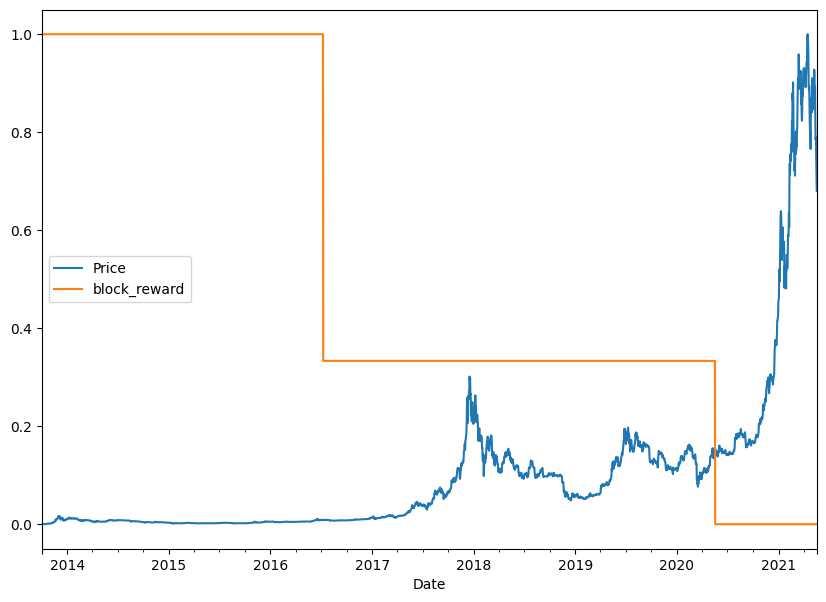

In [85]:
from sklearn.preprocessing import minmax_scale

scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price","block_reward"]]),
columns=bitcoin_prices_block.columns,
index=bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10,7))

## Making a windowed dataset with pandas 


In [86]:
HORIZON = 1 
WINDOW_SIZE = 7

In [87]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns 

for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
    
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [88]:
# Create X features and y horizons 
X = bitcoin_prices_windowed.dropna().drop("Price",axis=1).astype(np.float32)

y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [89]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [90]:
# Split to train and test 

split_size = int(len(X) * 0.8)

X_train, y_train = X[:split_size], y[:split_size]

X_test,y_test = X[split_size:], y[split_size:]

len(X_train),len(y_train),len(X_test),len(y_test)

(2224, 2224, 556, 556)

In [91]:
tf.random.set_seed(42)

# Make multivariate time series model 

model_6 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
],name="model_6_dense_multivariate")

# Compile 

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit 

model_6.fit(X_train,y_train,
            epochs=100,
            batch_size=128,
            validation_data=(X_test,y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 740.0436 INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 46ms/step - loss: 708.7571 - val_loss: 2263.3035
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 211.7339INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 45ms/step - loss: 209.3599 - val_loss: 882.9350
Epoch 3/100
14/18 [======================>.......] - ETA: 0s - loss: 158.7038INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 45ms/step - loss: 155.8662 - val_loss: 819.8378
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 147.2961INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 43ms/step - loss: 146.5632 - val_loss: 799.7484
Epoch 5/100
14/18 [======================>.......] - ETA: 0s - loss: 133.9309INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 55ms/step - loss: 132.3965 - val_loss: 693.0831
Epoch 6/100
11/18 [=================>............] - ETA: 0s - loss: 123.1516INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 42ms/step - loss: 125.7849 - val_loss: 659.4670
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 122.0054 - val_loss: 715.4888
Epoch 8/100
14/18 [======================>.......] - ETA: 0s - loss: 119.7870INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 40ms/step - loss: 120.0701 - val_loss: 636.3212
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 118.8690 - val_loss: 813.5287
Epoch 10/100
18/18 [==============================] - 0s 6ms/step - loss: 142.6461 - val_loss: 798.1339
Epoch 11/100
18/18 [==============================] - 0s 6ms/step - loss: 132.8748 - val_loss: 954.1594
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 141.3553 - val_loss: 760.2547
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 121.1712 - val_loss: 744.8667
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 118.9032 - val_loss: 676.4731
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 128.2026 - val_loss: 650.1197
Epoch 16/100
16/18 [=========================>....] - ETA: 0s - loss: 117.9929INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 42ms/step - loss: 120.1517 - val_loss: 607.5734
Epoch 17/100
18/18 [==============================] - 0s 9ms/step - loss: 112.3910 - val_loss: 613.7141
Epoch 18/100
12/18 [===================>..........] - ETA: 0s - loss: 117.4662INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 42ms/step - loss: 111.6833 - val_loss: 594.0026
Epoch 19/100
15/18 [========================>.....] - ETA: 0s - loss: 113.9747INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 42ms/step - loss: 115.6327 - val_loss: 587.0794
Epoch 20/100
18/18 [==============================] - 0s 5ms/step - loss: 108.1031 - val_loss: 610.2454
Epoch 21/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3326 - val_loss: 746.6417
Epoch 22/100
15/18 [========================>.....] - ETA: 0s - loss: 124.7246INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 42ms/step - loss: 119.9599 - val_loss: 584.4870
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 108.9238 - val_loss: 633.5174
Epoch 24/100
18/18 [==============================] - 0s 4ms/step - loss: 113.8530 - val_loss: 744.4081
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2092 - val_loss: 621.2402
Epoch 26/100
18/18 [==============================] - 0s 4ms/step - loss: 110.4809 - val_loss: 616.5059
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2301 - val_loss: 586.4800
Epoch 28/100
18/18 [==============================] - ETA: 0s - loss: 107.8962INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 39ms/step - loss: 107.8962 - val_loss: 577.8254
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 104.8487 - val_loss: 605.5060
Epoch 30/100
18/18 [==============================] - 0s 4ms/step - loss: 110.9190 - val_loss: 622.7369
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 108.3989 - val_loss: 583.1696
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 103.8338INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 39ms/step - loss: 110.4221 - val_loss: 574.4393
Epoch 33/100
18/18 [==============================] - 0s 7ms/step - loss: 109.4232 - val_loss: 584.2971
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 106.3021 - val_loss: 681.6042
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6243 - val_loss: 685.6693
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9770 - val_loss: 589.9265
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 110.6149 - val_loss: 610.3574
Epoch 38/100
18/18 [==============================] - 0s 4ms/step - loss: 114.3095 - val_loss: 629.7599
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1903 - val_loss: 576.9446
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 107.4169 - val_loss: 577.9575
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 10

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 40ms/step - loss: 111.5022 - val_loss: 572.1923
Epoch 44/100
15/18 [========================>.....] - ETA: 0s - loss: 104.8012INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 45ms/step - loss: 105.0783 - val_loss: 570.3766
Epoch 45/100
18/18 [==============================] - 0s 9ms/step - loss: 106.0239 - val_loss: 583.6287
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 112.0586 - val_loss: 632.0320
Epoch 47/100
18/18 [==============================] - 0s 9ms/step - loss: 114.8050 - val_loss: 597.8690
Epoch 48/100
16/18 [=========================>....] - ETA: 0s - loss: 103.4828INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 41ms/step - loss: 105.1643 - val_loss: 570.2969
Epoch 49/100
18/18 [==============================] - 0s 9ms/step - loss: 108.7897 - val_loss: 863.3886
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 124.0439 - val_loss: 797.6622
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 121.7918 - val_loss: 648.4105
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 119.4072 - val_loss: 705.8719
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 110.6556 - val_loss: 610.5165
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 110.0141 - val_loss: 603.0484
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 117.0033 - val_loss: 744.6322
Epoch 56/100
18/18 [==============================] - 0s 8ms/step - loss: 121.3403 - val_loss: 889.7574
Epoch 57/100
18/18 [==============================] - 0s 8ms/step - loss: 12

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 45ms/step - loss: 104.4472 - val_loss: 568.4493
Epoch 69/100
18/18 [==============================] - 0s 9ms/step - loss: 105.8395 - val_loss: 614.3583
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 117.3847 - val_loss: 675.6932
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 107.5268 - val_loss: 575.9047
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 106.8737 - val_loss: 636.9822
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 104.6579 - val_loss: 572.9102
Epoch 74/100
18/18 [==============================] - 0s 7ms/step - loss: 103.8628 - val_loss: 568.5963
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 106.9379 - val_loss: 568.8134
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 110.7747 - val_loss: 610.8443
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 11

In [92]:
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 5ms/step - loss: 866.1625


866.1625366210938

In [93]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")

model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 568.4493


568.4493408203125

In [94]:
# Make preds 

model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8813.428, 8767.835, 9045.075, 8723.281, 8713.942, 8744.136,
       8651.526, 8490.182, 8448.835, 8518.019], dtype=float32)>

In [95]:
# Evaluate preds 
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)

model_6_results

{'mae': 568.4494,
 'mse': 1162442.4,
 'rmse': 1078.1663,
 'mape': 2.5558891,
 'mase': 0.9986082}

In [96]:
model_1_results

{'mae': 570.3397,
 'mse': 1180294.9,
 'rmse': 1086.4137,
 'mape': 2.5392227,
 'mase': 0.99544233}

In [97]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Model 7 : N-BEATS algorithm 

### Building and testing N-BEATS block layer

In [99]:
# Create NBeatBlock custom layer 

class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self,
                 input_size: int,
                 theta_size: int,
                 horizon: int,
                 n_neurons: int,
                 n_layers: int,
                 **kwargs):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size= theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers
        
        # Block contains stack of 4 fully connected layers each has a ReLu activation 
        
        self.hidden =[tf.keras.layers.Dense(n_neurons,activation="relu") for _ in range(n_layers)]
        # Output of block is theta layer with linear activation 
        
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear",name="theta")
        
    def call(self,inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta =  self.theta_layer(x)
        # Output the backcast and the forecast from theta 
        backcast, forecast = theta[:, :self.input_size], theta[:,-self.horizon] 
        return backcast,forecast      

In [100]:
# Setup a dummy NBeatsBlock layer 

tf.random.set_seed(42)

dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [101]:
# Create dummy inputs (have to be same size as input size )

dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1,axis=0) 

dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>

In [102]:
# pass dummy inputs to dummy layer 
 
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

#These are the activation outputs of the theta layer 

print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.4634872   0.10944451 -0.4335534   0.93602407 -0.35703534 -0.17927621
 -0.34048355]
forecast: -0.4397900700569153


### Preparing data with `tf.data`

In [ ]:
HORIZON= 1
WINDOW_SIZE = 7

In [103]:
# Create N-BEATS data inputs 

bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [107]:
# Add windowed columns 

bitcoin_prices_nbeats = bitcoin_prices.copy()

for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
    
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [108]:
# Make features and labels 

X = bitcoin_prices_nbeats.dropna().drop("Price",axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test 

split_size = int(len(X)* 0.8)

X_train, y_train = X[:split_size], y[:split_size]

X_test,y_test = X[split_size:], y[split_size:]

len(X_train),len(y_train),len(X_test),len(y_test)

(2224, 2224, 556, 556)

In [109]:
# Time to make our dataset performant using tf.data API 

train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)

train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)

test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)


# Combine labels and features by zipping 

train_dataset = tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))

test_dataset = tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))


# Batch and prefetch 

BATCH_SIZE = 1024 
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset,test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)